In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D, LSTM, TimeDistributed, Reshape
from keras.models import Sequential
from keras.callbacks import TensorBoard
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read Data
data = pd.read_csv('UrbanSounds8K/metadata/UrbanSound8K.csv')
data.head(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
data.shape

(8732, 8)

In [5]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(7468, 4)

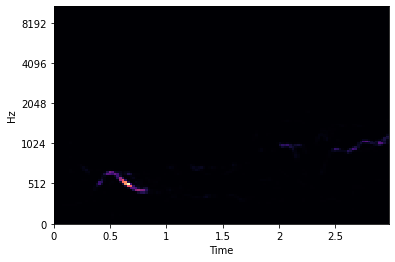

In [6]:
y, sr = librosa.load('UrbanSounds8K/audio/fold9/13579-2-0-16.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

mel_sgram = librosa.amplitude_to_db(ps, ref=np.min)

librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [7]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [6]:
#Use it to create data ######################################################################
def creates_train_data():
    D = [] # Dataset

    for row in valid_data.itertuples():
        y, sr = librosa.load('UrbanSounds8K/augmented/ps2_m25/' + row.path, duration=2.97)  #2.97 = 3*1000 - 3*1000/128  ###############################
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        if ps.shape != (128, 128): continue
        D.append( (ps, row.classID) )
    np.save('train_data_augmented_ps2_m25.npy', D) ###############################
    return D

In [7]:
#Use it to create data ######################################################################

tryd = [] # Dataset

for row in valid_data.itertuples():
    y, sr = librosa.load('UrbanSounds8K/augmented/ps2_m25/' + row.path, duration=2.97)  #2.97 = 3*1000 - 3*1000/128  ###############################
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    tryd.append( (ps, row.classID) )
    #np.save('train_data_augmented_ps2_m25.npy', D) ###############################



AttributeError: 'Pandas' object has no attribute 'path'

In [2]:
#D = creates_train_data()

np.load.__defaults__=(None, True, True, 'ASCII')
D = np.load('train_data_augmented_ps1_2.npy')

Each time if you want to create a new '.npy' file 
MAKE SURE you delete the previous(old) one in the directory!!!! 

In [9]:
print("Number of samples: ", len(D))

Number of samples:  7467


In [10]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

raise StopExecution

StopExecution: 

In [3]:
a = np.load('train_data.npy')
b = np.load('train_data_augmented_speed_81.npy')
c = np.load('train_data_augmented_speed_107.npy')
d = np.load('train_data_augmented_ps1_2.npy')
e = np.load('train_data_augmented_ps2_m25.npy')

In [31]:
np.savez('train.npz',a,b,c,d,e) ############################################################################

Need to remove previous version before save a new 'npz'. Otherwise will have bug

In [32]:
r = np.load('train.npz') ############################################################################

In [ ]:
locals().update(r) ############################################################################

In [4]:
tuple = (a,b,c,d,e)
tuplearr = np.vstack(tuple)
len(tuplearr)

37303

In [5]:
dataset = tuplearr
random.shuffle(dataset)
len(dataset)

37303

In [2]:
np.load.__defaults__=(None, True, True, 'ASCII')
D = np.load('train_data_augmented_ps1_2.npy')
a = np.load('train_data.npy')
b = np.load('train_data_augmented_speed_81.npy')
c = np.load('train_data_augmented_speed_107.npy')
d = np.load('train_data_augmented_ps1_2.npy')
e = np.load('train_data_augmented_ps2_m25.npy')
tuple = (a,b,c,d,e)
tuplearr = np.vstack(tuple)
len(tuplearr)
dataset = tuplearr
random.shuffle(dataset)
len(dataset)

37303

In [5]:
#To see how many samples are in X-train and y-train
kf = KFold(n_splits=10)

count = 0

keras.backend.clear_session()

for train_set, test_set in kf.split(dataset):
   print( train_set, test_set)
   print("-----------breaking line--------------")
   #X_train, X_test, y_train, y_test = dataset[train_set], dataset[test_set]

   print('----------------------------')
   count += 1
   print(count)
   print('----------------------------')

   X_train,y_train = zip(*dataset[train_set])
   X_test, y_test = zip(*dataset[test_set])

   # Reshape for CNN input
   X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
   X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

   #  X_train = np.expand_dims(X_train, axis=3)
   #  X_test = np.expand_dims(X_test, axis=3)

   # One-Hot encoding for classes
   y_train = np.array(keras.utils.to_categorical(y_train, 10))
   y_test = np.array(keras.utils.to_categorical(y_test, 10))


   NAME = "graphic-{}".format(int(time.time()))
   tensorboard = TensorBoard(log_dir='logs{}'.format(NAME +  str(count)))


   model = Sequential()
   input_shape = ( 128, 128, 1)

   model.add(Conv2D(24, (5, 5), strides=(1,1), input_shape = input_shape) )
   model.add(MaxPooling2D((4, 2), strides=(4, 2)))
   model.add(Activation('relu'))

   model.add(Conv2D(48, (5, 5), padding="valid"))
   model.add(MaxPooling2D((4, 2), strides=(4, 2)))
   model.add(Activation('relu'))

   model.add(Conv2D(48, (5, 5), padding="valid"))
   model.add(Activation('relu'))

   model.add(Flatten())
   model.add(Dropout(rate=0.5))

   model.add(Dense(64))
   model.add(Activation('relu'))
   model.add(Dropout(rate=0.5))

   
   model.add(Reshape((8, 8)))


   model.add(LSTM(units = 50, return_sequences=True)) 
   model.add(LSTM(32))
   model.add(Dense(10))
   model.add(Activation('softmax'))

   #convnet = tflearn.DNN(model, tensorboard_dir='log')

   model.compile(
      optimizer="Adam",
      loss="categorical_crossentropy",
      metrics=['accuracy']
      )


   model.fit(
      x=X_train, 
      y=y_train,
      epochs=12,
      batch_size=128,
      validation_data = (X_test, y_test),
      callbacks=[tensorboard]
      )

   score = model.evaluate(
      x=X_test,
      y=y_test
      )

   print('Test loss:', score[0])
   print('Test accuracy:', score[1])
   
 

#model.save('SoundClassification_CNNLSTM.model')

    

    


[ 3731  3732  3733 ... 37300 37301 37302] [   0    1    2 ... 3728 3729 3730]
-----------breaking line--------------
----------------------------
1
----------------------------
Epoch 1/12
263/263 [==============================] - 126s 479ms/step - loss: 1.6925 - accuracy: 0.3751 - val_loss: 1.2411 - val_accuracy: 0.5213
Epoch 2/12
263/263 [==============================] - 121s 461ms/step - loss: 1.2934 - accuracy: 0.5343 - val_loss: 1.0648 - val_accuracy: 0.5875
Epoch 3/12
263/263 [==============================] - 119s 454ms/step - loss: 1.1200 - accuracy: 0.6033 - val_loss: 0.8187 - val_accuracy: 0.7068
Epoch 4/12
263/263 [==============================] - 118s 447ms/step - loss: 0.9987 - accuracy: 0.6582 - val_loss: 0.7135 - val_accuracy: 0.7523
Epoch 5/12
263/263 [==============================] - 118s 448ms/step - loss: 0.9171 - accuracy: 0.6904 - val_loss: 0.6232 - val_accuracy: 0.8003
Epoch 6/12
263/263 [==============================] - 118s 449ms/step - loss: 0.8171 - accura

In [ ]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

raise StopExecution

StopExecution: 

In [23]:
filename = ""

#Audio-Convertor
def audioCon(filename):
   from os import path
   from pydub import AudioSegment
   
   # files                                                                         
   src = "Test/{filename}.mp3"
   dst = "Test/{filename}.wav"
   
   # convert wav to mp3                                                            
   sound = AudioSegment.from_mp3(src)
   sound.export(dst, format="wav")

In [ ]:
audioCon()

In [81]:
def prepare(filepath):
    y, sr = librosa.load(filepath, duration=2.97)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    ps.shape
    return ps.reshape(-1, 128, 128, 1)

In [67]:
model = tf.keras.models.load_model("SoundClassification.model")

In [83]:
prediction = model.predict([prepare('Test/airc.wav')])
max = np.amax(prediction)
print(max)
print(prediction)

0.90739536
[[9.0739536e-01 1.0987020e-05 7.2039278e-05 7.7610814e-05 1.3195210e-02
  9.4531840e-03 1.2650190e-07 6.9615506e-02 4.5010489e-05 1.3501685e-04]]
